In [2]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [3]:
# Load Dataset
dataset_path = "../dataset/QuestionExamsStudents.xlsx"
df = pd.read_excel(dataset_path)

In [5]:
# EDA : Exploratory Data Analyst
print("Shape Dataset : ", df.shape)
print("\nColumn : ", df.columns.tolist())
print("\nMissing Value : \n", df.isnull().sum())
print("\nDistribution of Difficulty Levels : \n", df["tingkat_kesulitan"].value_counts())
df.head()


Shape Dataset :  (500, 5)

Column :  ['id', 'mata_pelajaran', 'tingkat_kesulitan', 'soal', 'jawaban']

Missing Value : 
 id                   0
mata_pelajaran       0
tingkat_kesulitan    0
soal                 0
jawaban              0
dtype: int64

Distribution of Difficulty Levels : 
 tingkat_kesulitan
Sulit     190
Mudah     155
Sedang    155
Name: count, dtype: int64


,id,mata_pelajaran,tingkat_kesulitan,soal,jawaban
0,1,Bahasa Indonesia,Mudah,Pilih sinonim dari kata 'besar'.,agung
1,2,Matematika,Sulit,Berapakah 16 + 10?,26
2,3,Bahasa Inggris,Sulit,Translate to English: 'Saya pergi ke sekolah'.,I go to school
3,4,IPS,Sedang,Siapakah proklamator kemerdekaan Indonesia?,Soekarno dan Hatta
4,5,Bahasa Indonesia,Mudah,Pilih sinonim dari kata 'besar'.,agung


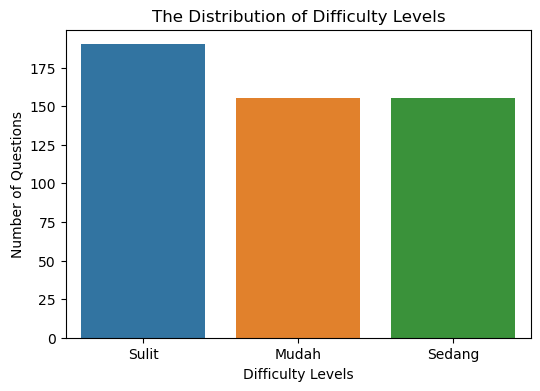

In [6]:
# Visualization of the distribution of difficulty levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='tingkat_kesulitan', order=df['tingkat_kesulitan'].value_counts().index)
plt.title("The Distribution of Difficulty Levels")
plt.xlabel("Difficulty Levels")
plt.ylabel("Number of Questions")
plt.show()

In [7]:
# Preprocessing
df = df.dropna(subset=['soal', 'tingkat_kesulitan'])

In [9]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
  df['soal'],
  df['tingkat_kesulitan'],
  test_size=0.2,
  stratify=df['tingkat_kesulitan'],
  random_state=42
)

In [10]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {acc:.4f}")
print("\nClassification Report :\n", classification_report(y_test, y_pred))


Accuracy : 0.3300

Classification Report :
               precision    recall  f1-score   support

       Mudah       0.27      0.26      0.26        31
      Sedang       0.33      0.10      0.15        31
       Sulit       0.36      0.58      0.44        38

    accuracy                           0.33       100
   macro avg       0.32      0.31      0.29       100
weighted avg       0.32      0.33      0.30       100



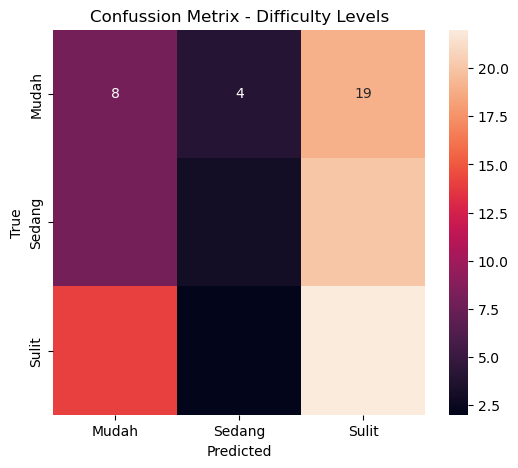

In [13]:
# Confussion Metrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel("True")
plt.title('Confussion Metrix - Difficulty Levels')
plt.show()

In [16]:
joblib.dump(model, "../notebook/artifacts/model.joblib")
joblib.dump(vectorizer, "../notebook/artifacts/vectorizer.joblib")
print("\nModel and Vectorizer successfully saved in notebook/artifacts")



Model and Vectorizer successfully saved in notebook/artifacts
